# CS 613 NLP: Assignment 3

In [0]:
# Extracting the dataset and making a list of tweets witha list of tokens
fp = open("train.txt", 'r')
final_raw_train=[]
q=0
while(q!=15131):
  lst=[]
  q=q+1
  for line in fp:
    line = line.strip()
    if len(line.split())>1:
      lst.append(line.split())
    if line=='':
      final_raw_train.append(lst)
      break
fp = open("test.txt", 'r')
final_raw_test=[]
q=0
while(q!=1869):
  lst=[]
  q=q+1
  for line in fp:
    line = line.strip()
    if len(line.split())>1:
      lst.append(line.split())
    if line=='':
      final_raw_test.append(lst)
      break

In [105]:
final_raw_test[0]

[['meta', '8', 'neutral'],
 ['RT', 'Eng'],
 ['@', 'O'],
 ['UAAPconfessions', 'Eng'],
 ['Love', 'Eng'],
 ['looks', 'Eng'],
 ['good', 'Eng'],
 ['on', 'Eng'],
 ['Maddie', 'Eng'],
 ['!!!', 'O'],
 ['Ako', 'Eng'],
 ['lang', 'Eng'],
 ['ba', 'Eng'],
 ['yung', 'Eng'],
 ['sobrang', 'Eng'],
 ['masaya', 'Hin'],
 ['kasi', 'Hin'],
 ['may', 'Hin'],
 ['zolo', 'Eng'],
 ['sya', 'Eng'],
 ['?', 'O'],
 ['Before', 'Eng'],
 ['with', 'Eng'],
 ['the', 'Eng'],
 ['past', 'Eng'],
 ['Z', 'Hin'],
 ['medyo', 'Eng'],
 ['lowkey', 'Eng'],
 ['s', 'Eng'],
 ['…', 'O']]

In [106]:
# Bad tweet
final_raw_train[8324]

[['meta', '23878', 'neutral'],
 ['RT', 'Eng'],
 ['@', 'O'],
 ['LudekNie', 'Hin'],
 ['Logika', 'Hin'],
 ['AB', 'Eng'],
 ['V', 'Eng'],
 ['ý', 'O'],
 ['rok', 'Hin'],
 ['Komise', 'Hin'],
 ['o', 'Hin'],
 ['konfliktu', 'Hin'],
 ['z', 'Hin'],
 ['á', 'O'],
 ['jm', 'Hin'],
 ['ů', 'O'],
 ['odm', 'Hin'],
 ['í', 'O'],
 ['t', 'Hin'],
 ['á', 'O'],
 ['m', 'Hin'],
 ['odm', 'Hin'],
 ['í', 'O'],
 ['taj', 'Hin'],
 ['í', 'O'],
 ['ho', 'Hin'],
 ['m', 'Hin'],
 ['í', 'O'],
 ['pr', 'Eng'],
 ['á', 'O'],
 ['vn', 'Eng'],
 ['í', 'O'],
 ['ci', 'Eng'],
 ['.', 'O'],
 ['Pro', 'Eng'],
 ['č?', 'O'],
 ['Č', 'O'],
 ['ek', 'Hin'],
 ['á', 'O'],
 ['me', 'Hin'],
 ['na', 'Hin'],
 ['p', 'Hin'],
 ['ř', 'O'],
 ['eklad', 'Hin'],
 ['a', 'Hin'],
 ['pak', 'Hin'],
 ['se', 'Hin'],
 ['vyj', 'Eng'],
 ['á', 'O'],
 ['d', 'Hin'],
 ['ří', 'O'],
 ['me', 'Hin'],
 ['?', 'O'],
 ['Ch', 'Hin'],
 ['á', 'O'],
 ['pe', 'Hin'],
 ['…', 'O']]

In [0]:
# Making a list of id and tweet
y_train = []
train_id = []
for tweet in final_raw_train:
  train_id.append(tweet[0][1])
  y_train.append(tweet[0][2])

y_test = []
test_id = []
for tweet in final_raw_test:
  test_id.append(tweet[0][1])
  y_test.append(tweet[0][2])

In [108]:
# Stats of train dataset
from collections import Counter
y_train_dist = Counter(y_train)
y_train_dist

Counter({'negative': 4459, 'positive': 5034, 'neutral': 5638})

In [109]:
# Stats of test dataset
from collections import Counter
y_test_dist = Counter(y_test)
y_test_dist

Counter({'neutral': 754, 'negative': 533, 'positive': 582})

In [0]:
with open("y_train.txt",'w') as f:
  for id1, sentiment in zip(train_id, y_train):
      f.write(id1+"\t"+sentiment+"\n")

In [0]:
with open("y_test.txt",'w') as f:
  for id1, sentiment in zip(test_id, y_test):
      f.write(id1+"\t"+sentiment+"\n")

In [0]:
# Converting each sentiment into one-hot encoding of train
y_dct = {'negative':-1, "neutral":0,"positive":1}
y_train_final = []
for i, stance in enumerate(y_train):
  y_train_final.append(y_dct[stance])

import numpy as np 
y_train_final = np.array(y_train_final)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_train_final.reshape(-1, 1))
y_train_final = enc.transform(y_train_final.reshape(-1, 1)).toarray()


In [113]:
y_train_final

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [0]:
# Converting each sentiment into one-hot encoding of test
y_dct = {'negative':-1, "neutral":0,"positive":1}

y_test_final = []
for i, stance in enumerate(y_test):
  y_test_final.append(y_dct[stance])
stanceoftest=[]
for i in y_test_final:
  stanceoftest.append(i)
import numpy as np 

y_test_final = np.array(y_test_final)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_test_final.reshape(-1, 1))
y_test_final = enc.transform(y_test_final.reshape(-1, 1)).toarray()

In [115]:
y_test_final

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [0]:
# Preprocessing of train dataset
import re
final_new_train = []
for i in range(15131):
  temp = []
  for j in range(len(final_raw_train[i])):
    if bool(re.match("^[a-zA-Z]+$",final_raw_train[i][j][0])):
      if bool(re.match("^(http)|(^t$)|(^co$)",final_raw_train[i][j][0])):
        continue
      else:
        final_raw_train[i][j][0] = final_raw_train[i][j][0].lower()
        temp.append(final_raw_train[i][j])
  final_new_train.append(temp[1:])

In [0]:
# Preprocessing of test dataset
import re
final_new_test = []
for i in range(1869):
  temp = []
  for j in range(len(final_raw_test[i])):
    if bool(re.match("^[a-zA-Z]+$",final_raw_test[i][j][0])):
      if bool(re.match("^(http)|(^t$)|(^co$)",final_raw_test[i][j][0])):
        continue
      else:
        final_raw_test[i][j][0] = final_raw_test[i][j][0].lower()
        temp.append(final_raw_test[i][j])
  final_new_test.append(temp[1:])

In [118]:
final_new_train

[[['adilnisarbutt', 'Hin'],
  ['pakistan', 'Hin'],
  ['ka', 'Hin'],
  ['ghra', 'Hin'],
  ['tauq', 'Hin'],
  ['he', 'Eng'],
  ['pakistan', 'Eng'],
  ['israel', 'Eng'],
  ['ko', 'Eng'],
  ['tasleem', 'Hin'],
  ['nahein', 'Hin'],
  ['kerta', 'Hin'],
  ['isko', 'Hin'],
  ['palestine', 'Hin'],
  ['kehta', 'Hin'],
  ['he', 'Hin'],
  ['occupied', 'Hin'],
  ['palestine', 'Hin']],
 [['madarchod', 'Hin'],
  ['mulle', 'Hin'],
  ['ye', 'Hin'],
  ['mathura', 'Hin'],
  ['me', 'Hin'],
  ['nahi', 'Hin'],
  ['dikha', 'Hin'],
  ['tha', 'Hin'],
  ['jab', 'Hin'],
  ['mullo', 'Hin'],
  ['ne', 'Hin'],
  ['hindu', 'Hin'],
  ['ko', 'Hin'],
  ['iss', 'Hin'],
  ['liye', 'Hin'],
  ['mara', 'Hin'],
  ['ki', 'Hin'],
  ['vo', 'Hin'],
  ['lasse', 'Hin'],
  ['ki', 'Hin'],
  ['paise', 'Hin'],
  ['mag', 'Hin'],
  ['liye', 'Hin'],
  ['the', 'Eng']],
 [['narendramodi', 'Hin'],
  ['manya', 'Hin'],
  ['pradhan', 'Hin'],
  ['mantri', 'Hin'],
  ['mahoday', 'Hin'],
  ['shriman', 'Hin'],
  ['narendra', 'Hin'],
  ['modi', 'Hin'

In [0]:
with open("X_train.txt",'w') as f:
  for id1, tweet in zip(train_id, final_new_train):
      f.write(id1+"\t"+" ".join([j[0] for j in tweet[1:-1]])+"\n")

In [0]:
with open("X_test.txt",'w') as f:
  for id1, tweet in zip(test_id, final_new_test):
      f.write(id1+"\t"+" ".join([j[0] for j in tweet[1:-1]])+"\n")

Word Cloud of train

In [0]:
all_words = []
for tweet in final_new_train:
  words = []
  words.append(" ".join([token[0] for token in tweet[1:]]))
  all_words.extend(words)
all_words = " ".join(all_words)

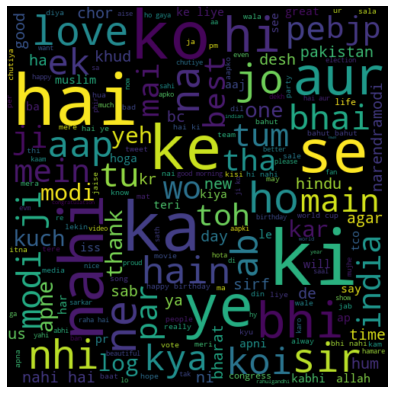

In [122]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=500, height=500, random_state=21, max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Word Cloud of test

In [0]:
all_words = []
for tweet in final_new_test:
  words = []
  words.append(" ".join([token[0] for token in tweet[1:]]))
  all_words.extend(words)
all_words = " ".join(all_words)

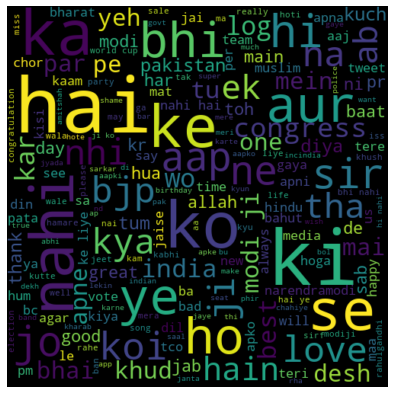

In [124]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=500, height=500, random_state=21, max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
!pip install flair

In [0]:
# Converting tokens to sentence
from flair.data import Sentence

english_sent_train = []
for i in range(len(final_new_train)):
  sent = Sentence(" ".join([j[0] for j in final_new_train[i]]))
  english_sent_train.append(sent)

In [0]:
from flair.data import Sentence

english_sent_test = []
for i in range(len(final_new_test)):
  sent = Sentence(" ".join([j[0] for j in final_new_test[i]]))
  english_sent_test.append(sent)

In [128]:
english_sent_train[8324]

Sentence: "rt ludeknie logika ab v rok komise o konfliktu z jm odm m odm taj ho m pr vn ci pro ek me na p eklad a pak se vyj d me ch pe" - 34 Tokens

In [0]:
# Generating emmbeddings of sentences (train)
from flair.embeddings import BertEmbeddings
embedding_bert = BertEmbeddings("bert-base-cased")

embeddings_train = []
for sent in english_sent_train:
  embeddings_train.append(embedding_bert.embed(sent))

import numpy as np

bert_embeddings_train = []
for i in embeddings_train:
  temp = []
  for j in i[0]:
    temp.append(np.array(j.embedding.cpu()))
  bert_embeddings_train.append(np.array(temp))

In [0]:
# Generating emmbeddings of sentences (test)
from flair.embeddings import BertEmbeddings
embedding_bert = BertEmbeddings("bert-base-cased")

embeddings_test = []
for sent in english_sent_test:
  embeddings_test.append(embedding_bert.embed(sent))

import numpy as np

bert_embeddings_test = []
for i in embeddings_test:
  temp = []
  for j in i[0]:
    temp.append(np.array(j.embedding.cpu()))
  bert_embeddings_test.append(np.array(temp))

In [93]:
bert_embeddings_train[2].shape


(16, 3072)

In [94]:
print(bert_embeddings_test[1].shape)
print(len(final_new_test[1]))

(18, 3072)
18


In [95]:
!pip install keras_Self_attention
!pip install keras_multi_head
!pip install keras_tqdm

In [96]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import torch
from torch.nn.utils.rnn import PackedSequence, pack_padded_sequence, pad_sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import GRU
from keras.layers import Bidirectional
from keras import regularizers
from keras import optimizers
from keras.layers import merge, Multiply
from keras.layers.core import *
from keras.layers.recurrent import LSTM
from keras.models import *
from keras.layers import concatenate
import keras
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.layers import Dropout
from keras_self_attention import SeqSelfAttention
from keras_multi_head import MultiHead
from keras_multi_head import MultiHeadAttention
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import EarlyStopping
from keras import regularizers

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
max_len_train = max([len(tweet) for tweet in final_new_train])
max_len_train

35

In [98]:
max_len_test = max([len(tweet) for tweet in final_new_test])
max_len_test

31

In [0]:
# Adding a bit to the embedding of each token depending upon its language
hi_en = {'Hin':0, 'Eng':1}

X_train_app = []
for i, j in zip(bert_embeddings_train, final_new_train):
  temp = [hi_en[k[1]] for k in j]
  a = np.array(temp).reshape((len(temp), 1))
  b = np.array(i)
  X_train_app.append(np.hstack((a, b)))   

X_test_app = []
for i, j in zip(bert_embeddings_test, final_new_test):
  temp = [hi_en[k[1]] for k in j]
  a = np.array(temp).reshape((len(temp), 1))
  b = np.array(i)
  X_test_app.append(np.hstack((a, b)))   

In [0]:
# Padding with appends
emb_list = []
for i in X_train_app:
  emb_list.append(torch.tensor(i[:MAX_SEQ_LEN_test]).cuda())
X_train_app = pad_sequence(emb_list, batch_first=True)

emb_list = []
for i in X_test_app:
  emb_list.append(torch.tensor(i[:MAX_SEQ_LEN_test]).cuda())
X_test_app = pad_sequence(emb_list, batch_first=True)

In [0]:
# Padding without appends
X_train = bert_embeddings_train
X_test = bert_embeddings_test
emb_list = []
for i in X_train:
  emb_list.append(torch.tensor(i[:MAX_SEQ_LEN_test]).cuda())
X_train = pad_sequence(emb_list, batch_first=True)

emb_list = []
for i in X_test:
  emb_list.append(torch.tensor(i[:MAX_SEQ_LEN_test]).cuda())
X_test = pad_sequence(emb_list, batch_first=True)

In [0]:
# Model
from keras.layers import GRU
model_GRU = Sequential()
model_GRU.add(Bidirectional(LSTM(10, dropout=0.5, recurrent_dropout=0.5, return_sequences=True), input_shape=(31, 3072), merge_mode='concat'))
model_GRU.add(GRU(8, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
model_GRU.add(SeqSelfAttention(attention_activation='sigmoid'))
model_GRU.add(Dense(8, activation='softmax'))
model_GRU.add(Dense(3, activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_GRU.fit(x=X_train.cpu().numpy(), y=y_train_final, validation_data=(X_test.cpu().numpy(), y_test_final),	batch_size=32, epochs=30, shuffle=True)


In [0]:
model_GRU.evaluate(X_test.cpu().numpy(), y_test_final)

1869/1869 [==============================] - 4s 2ms/step


[0.9697515129596553, 0.555912252700922]

In [0]:
predictions = model_GRU.predict_classes(X_test.cpu().numpy())
y_pred=[]
for i in predictions:
  if i==1:
    y_pred.append(0)
  elif i==2:
    y_pred.append(1)
  else:
    y_pred.append(-1)
import numpy as np 

y_pred = np.array(y_pred)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_pred.reshape(-1, 1))
y_pred = enc.transform(y_pred.reshape(-1, 1)).toarray()

In [0]:
# Analysis
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print('Accuracy: ', accuracy_score(y_test_final.argmax(axis=1), y_pred.argmax(axis=1)))
print('\n','Report: ')
print(classification_report(y_test_final, y_pred, target_names=target_names))

Accuracy:  0.555912252541466

 Report: 
              precision    recall  f1-score   support

    negative       0.56      0.51      0.53       533
     neutral       0.52      0.57      0.55       754
    positive       0.61      0.57      0.59       582

   micro avg       0.56      0.56      0.56      1869
   macro avg       0.56      0.55      0.56      1869
weighted avg       0.56      0.56      0.56      1869
 samples avg       0.56      0.56      0.56      1869

